<a href="https://colab.research.google.com/github/ggpal7117/Stock-Return-Analysis-with-Monte-Carlo-Simulation/blob/main/Stock_Portfolio_Analysis_w_Monte_Carlo_Simulation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook we will simulate stock returns using a monte carlo simulation for two different stock portfolio.

Scenario: I am a college student who works a part time job and want to invest in a eft(usually a "portfolio" of stocks). Using a monte carlo simulation, we can simulate returns over time for these portfolios to see which will statistically give me the most money by the time I graduate

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
import lxml
from datetime import date
from dateutil.relativedelta import relativedelta
import requests
from scipy.stats import shapiro
from datetime import datetime
import matplotlib.dates as mdates

In [43]:
# How much money you will invest into a portfolio each year
ANNUAL_INVESTMENT_AMT = 1000

In [44]:
# Will create 4 "portfolios" from Commodity, Country, Sector, Index ETFS
# Commodoties Choice: GDXJ --> VanEck Junior Gold Miners ETF
# Index: QQQ --> Invesco QQQ Trust
# Sector: SMH -->	VanEck Semiconductor ETF
# Country: GREK: Greece
invesments = ["GDXJ", "QQQ", "SMH", "GREK"]
investment_names = ["VanEck Junior Gold Miners ETF", "Invesco QQQ Trust", "VanEck Semiconductor ETF", "Greece"]

In [45]:
today = date.today() - relativedelta(days=2)
sim_start_date = today - relativedelta(years=10)
sim_start_date

datetime.date(2015, 10, 12)

/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed
/tmp/ipython-input-970309070.py:5: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(stock, start=sim_start_date, end=today)
[*********************100%***********************]  1 of 1 completed


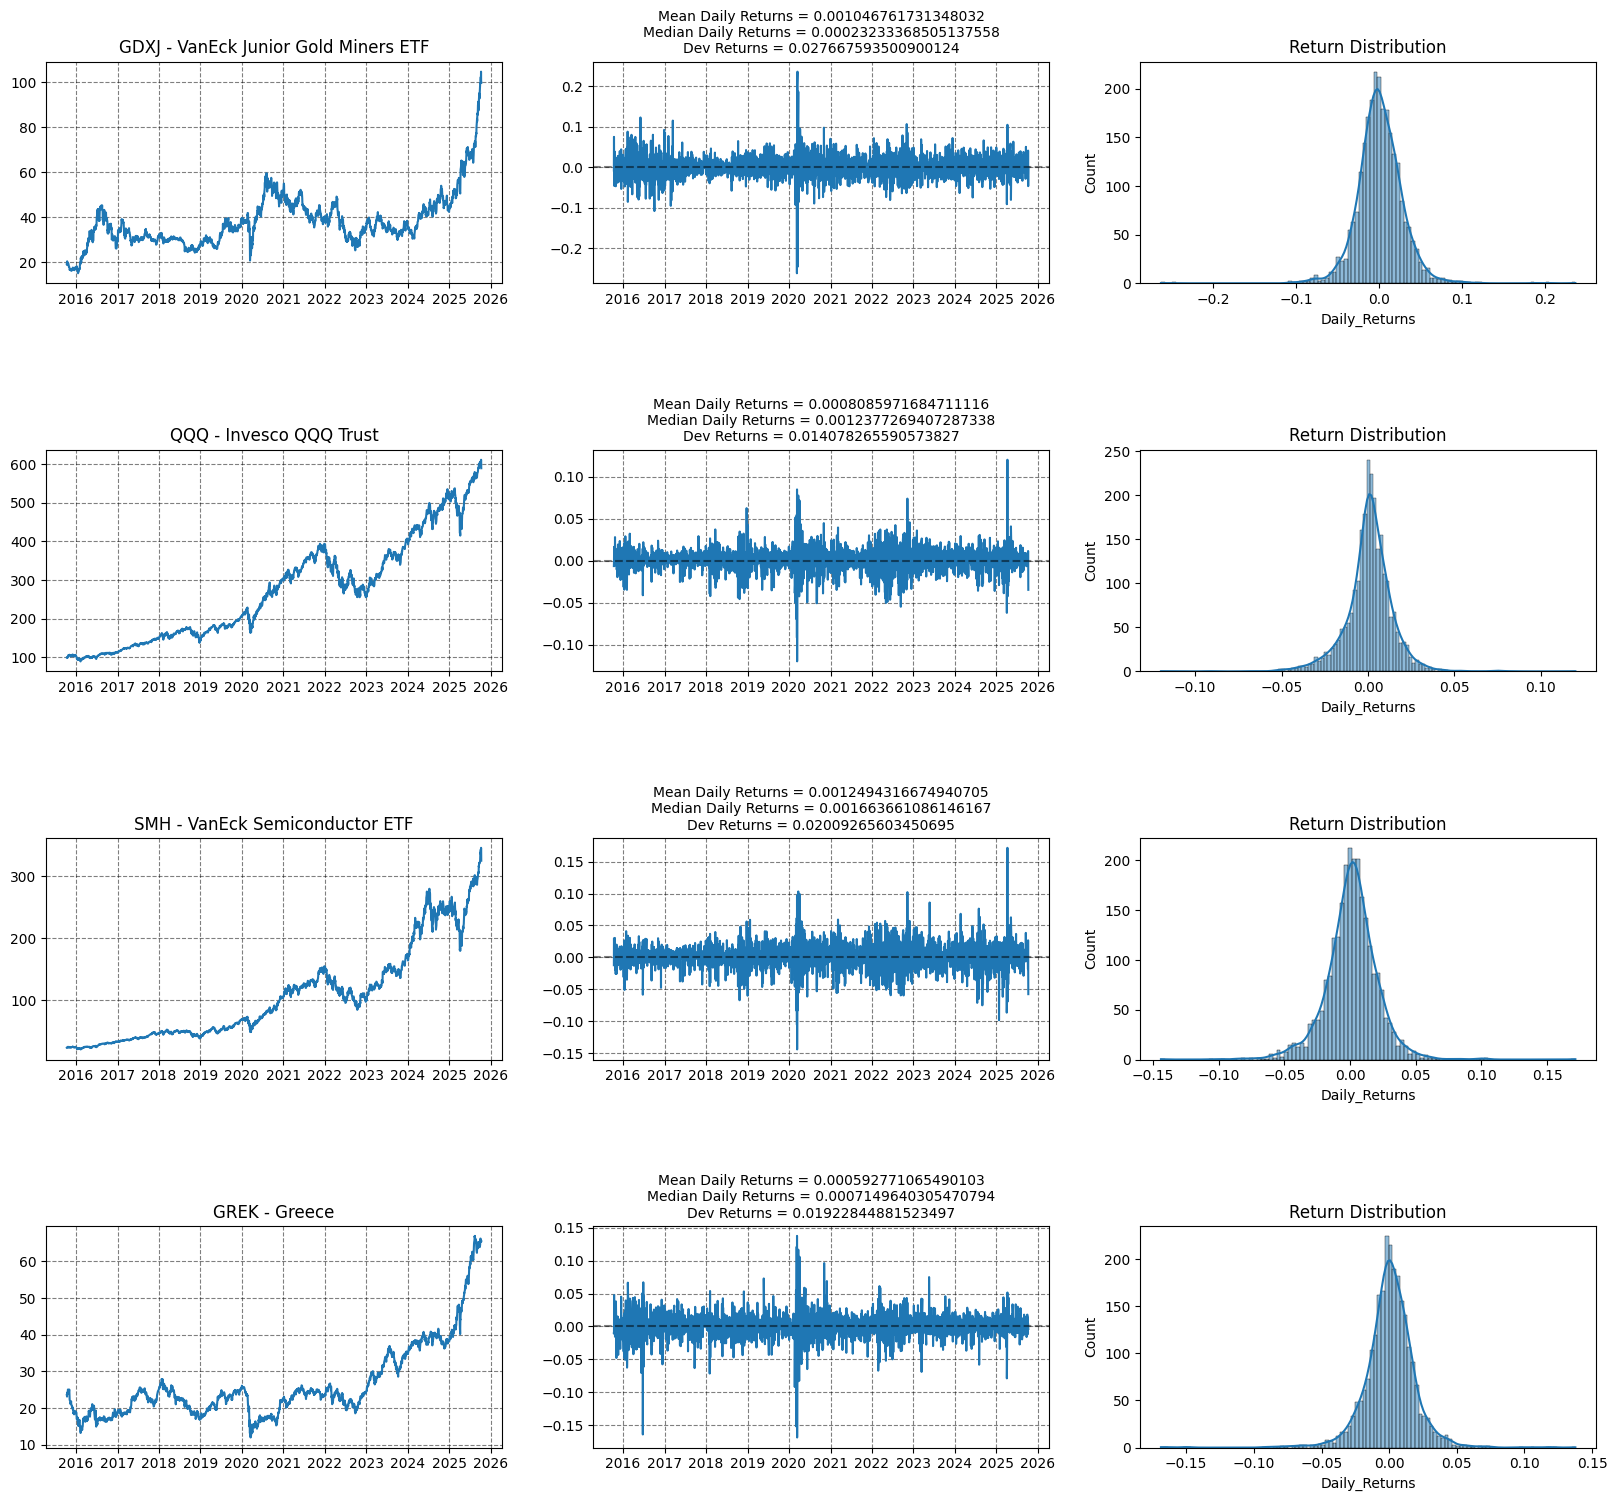

In [46]:
# Get all stock data
fig, ax = plt.subplots(4, 3, figsize=(20, 18))
stock_data = pd.DataFrame() # Must loop through to identify which stock is which
for i, stock in enumerate(invesments):
    data = yf.download(stock, start=sim_start_date, end=today)
    data.columns = data.columns.values
    data.columns = ["Close", "High", "Low", "Open", "Volume"]
    data["Stock"] = stock
    data["(t+1)"] = data["Close"].shift(-1)
    data["Daily_Returns"] = (data["(t+1)"] - data["Close"])/data["Close"]
    ax[i,0].plot(data["Close"])
    ax[i,0].set_title(f"{stock} - {investment_names[i]}")
    ax[i,0].grid(alpha = 0.5, color = 'k', linestyle='--')

    ax[i,1].plot(data["Daily_Returns"])
    ax[i,1].set_title(f"Mean Daily Returns = {data["Daily_Returns"].mean()}\nMedian Daily Returns = {data["Daily_Returns"].median()}\nDev Returns = {data["Daily_Returns"].std()}", fontsize = 10)
    ax[i,1].grid(alpha = 0.5, color = 'k', linestyle='--')
    ax[i,1].axhline(y=0, color='k', linestyle='--', alpha = 0.5)

    sns.histplot(data["Daily_Returns"], ax=ax[i,2], kde=True)
    #shap, p = shapiro(data["Daily_Returns"])
    ax[i, 2].set_title(f"Return Distribution")

    stock_data = pd.concat([stock_data, data])

stock_data
plt.subplots_adjust(hspace=0.75)
plt.show()

In [47]:
# Add colummn shifted a year, and yearly returns
stock_data["(t+year)"] = stock_data["Close"].shift(-252)
stock_data["Yearly_Returns"] = (stock_data["(t+year)"] - stock_data["Close"])/stock_data["Close"]
stock_data["Log_Returns"] = np.log(stock_data["(t+year)"]/stock_data["Close"])
stock_data.head()

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2015-10-12,18.917856,19.604040,18.648593,19.604040,14385500,GDXJ,18.761511,-0.008264,32.642136,0.725467,0.545498
2015-10-13,18.761511,19.213177,18.613851,18.770197,6453300,GDXJ,20.168625,0.075000,33.508266,0.786011,0.579985
2015-10-14,20.168625,20.272856,19.143692,19.195807,21102000,GDXJ,20.272856,0.005168,34.251926,0.698278,0.529615
2015-10-15,20.272856,20.481317,19.638787,19.777761,8536300,GDXJ,19.577986,-0.034276,33.315792,0.643369,0.496749
2015-10-16,19.577986,20.342343,19.534555,20.194683,12008200,GDXJ,18.665966,-0.046584,33.866970,0.729850,0.548034


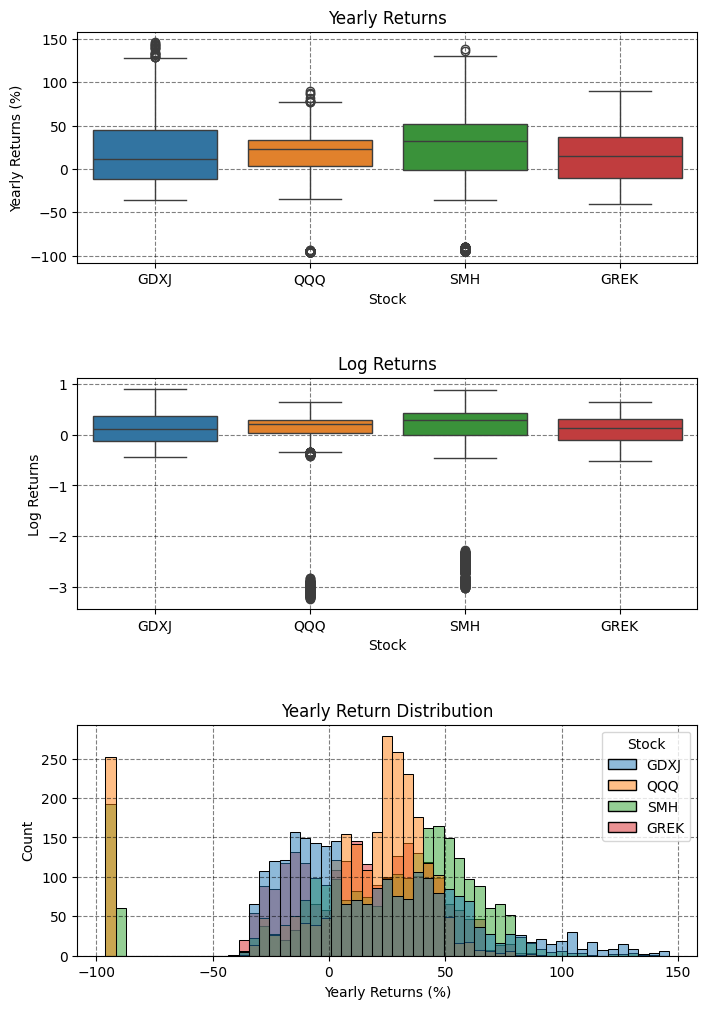

In [48]:
fig, ax = plt.subplots(3, 1, figsize=(8, 12))
stock_data_reset = stock_data.reset_index()
sns.boxplot(x="Stock", y=stock_data_reset["Yearly_Returns"]*100, data=stock_data_reset, hue = "Stock", ax=ax[0])
ax[0].set_title("Yearly Returns")
ax[0].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[0].set_ylabel("Yearly Returns (%)")

sns.boxplot(x="Stock", y="Log_Returns", data=stock_data_reset, hue = "Stock", ax=ax[1])
ax[1].set_title("Log Returns")
ax[1].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[1].set_ylabel("Log Returns")


sns.histplot(data=stock_data_reset, x=stock_data_reset["Yearly_Returns"]*100, ax=ax[2], hue = "Stock")
ax[2].set_title("Yearly Return Distribution")
ax[2].grid(alpha = 0.5, color = 'k', linestyle='--')
ax[2].set_xlabel("Yearly Returns (%)")


plt.subplots_adjust(hspace=0.5)
plt.show()

In [49]:
# Lets see how much 1000 wouldve compunded if we invested in 2015 (SIMPLE INTEREST/NO REINVESTMENT)
def calc_return(stock, amt=1000):
  subset = stock_data.query('Stock == @stock')
  pct_change_total = ((subset.Close.iloc[-1] - subset.Close.iloc[0]) / subset.Close.iloc[0])*100
  print(f"{stock} 10 year return: {round(pct_change_total, 2)}%")
  return pct_change_total * amt

def avg_yearly_return(stock):
  subset = stock_data.query('Stock == @stock')
  return round(subset["Yearly_Returns"].mean()*100, 2), round(subset["Yearly_Returns"].std()*100, 2)


print((f"$1000 invested in QQQ on {sim_start_date} compounds to {round(calc_return("QQQ"), 2)}"))
print(f"QQQ Average Yearly Return: {avg_yearly_return("QQQ")[0]}%. QQQ Standard Deviation: {avg_yearly_return("QQQ")[1]}")
print()

print((f"$1000 invested in GREK on {sim_start_date} compounds to {round(calc_return("GREK"), 2)}"))
print(f"GREK Average Yearly Return: {avg_yearly_return("GREK")[0]}%. GREK Standard Deviation: {avg_yearly_return("GREK")[1]}")
print()

print((f"$1000 invested in GDXJ on {sim_start_date} compounds to {round(calc_return("GDXJ"), 2)}"))
print(f"GDXJ Average Yearly Return: {avg_yearly_return("GDXJ")[0]}%. GDXJ Standard Deviation: {avg_yearly_return("GDXJ")[1]}")
print()

print((f"$1000 invested in SMH on {sim_start_date} compounds to {round(calc_return("SMH"), 2)}"))
print(f"SMH Average Yearly Return: {avg_yearly_return("SMH")[0]}%. SMH Standard Deviation: {avg_yearly_return("SMH")[1]}")

QQQ 10 year return: 494.55%
$1000 invested in QQQ on 2015-10-12 compounds to 494552.83
QQQ Average Yearly Return: 9.96%. QQQ Standard Deviation: 39.87

GREK 10 year return: 177.37%
$1000 invested in GREK on 2015-10-12 compounds to 177365.28
GREK Average Yearly Return: 15.17%. GREK Standard Deviation: 27.76

GDXJ 10 year return: 428.07%
$1000 invested in GDXJ on 2015-10-12 compounds to 428072.53
GDXJ Average Yearly Return: 20.12%. GDXJ Standard Deviation: 38.18

SMH 10 year return: 1289.94%
$1000 invested in SMH on 2015-10-12 compounds to 1289936.86
SMH Average Yearly Return: 20.21%. SMH Standard Deviation: 47.15


In [50]:
# Lets now do a "backtesting" simulation to see how well stocks perform over a random
# We will assume investments happen yearly
end_range_max = today - relativedelta(years=4)
date_ls = stock_data.index[stock_data.index < pd.to_datetime(end_range_max)]


def get_nearest_trading_day(target_date, valid_dates):
  valid_dates = valid_dates.sort_values()
  if target_date in valid_dates:
    return target_date

  # If date before earliest or after latest
  if target_date < valid_dates.min():
    return valid_dates.min()

  if target_date > valid_dates.max():
    return valid_dates.max()

  # Otherwise nearest before or equal
  return valid_dates[valid_dates <= target_date].max()


def plot(dates, subset):
  """Plot close with simulated dates"""
  plt.figure(figsize=(10, 6))
  plt.plot(subset.Close)

  for i, date in enumerate(dates):
    if i == 0:
      plt.axvline(x=date, color='g', linestyle='--', alpha=0.5)
    elif i == 4:
      plt.axvline(x=date, color='r', linestyle='--', alpha=0.5)
    else:
      plt.axvline(x=date, color='y', linestyle='--', alpha=0.5)

  plt.title(f"Price History for {subset.Stock.unique()[0]}")
  plt.xlabel("Date")
  plt.ylabel("Close Price")
  plt.grid(True)
  plt.show()


def compount_interest(rates, init_amount = 1000, verbose = False):
  """Perform Compound Interest Calculator that will track investments(all 4) over a certain period of time"""
  total = 0
  for i in range(4):
    if verbose:
      print(f"Investment Number {i} of 3")
    start = init_amount
    for j in range(i, 4):
      if verbose:
        print(f"---Investment {i} grows from {start}(at time period {j} to time period {j+1}) to --> {(start)*(1+rates[j])}")
      start = (start)*(1+rates[j])

    total += start
    if verbose:
      print(f"\nTotal Value: {total}")
    if verbose:
      print()

  total = np.round(total, 2)
  return total


def rand_range_single_sim(date_range, stock, should_plot=False, verbose=False, start_date = None):
  global ANNUAL_INVESTMENT_AMT
  # Subset by stock
  subset = stock_data.query('Stock == @stock')


  if start_date is None:
    start_date = pd.Timestamp(np.random.choice(date_range.unique()))
    start_trading_date = get_nearest_trading_day(start_date, subset.index)
  else:
    start_trading_date = get_nearest_trading_day(start_date, subset.index) # Make sure it is a valid trading day

  # --- Build list of yearly investment dates (5 years total range) ---
  dates = [start_trading_date]
  for i in range(1, 5):
      next_date = start_date + pd.DateOffset(years=i)
      next_trading_day = get_nearest_trading_day(next_date, subset.index)
      dates.append(next_trading_day)

  random_dates_df = subset[subset.index.isin(dates)]

  if verbose:
    display(random_dates_df)

  # Optinonal plot
  if should_plot:
    plot(dates, subset)


  # Perform actual single "simuation".
  # Track 1000 invested in dates[0] --> dates[4] and see how much it grows
  # Track 1000 invested in dates[1] --> dates[4] and see how much it grows
  # ....
  # Track 1000 invested in dates[3] --> dates[4] and see how much it grows
  # Sum everything
  total_value = 0

  if verbose:
    print(f"\n===== Simulating {stock} from {dates[0].date()} to {dates[-1].date()} =====")

  prices = random_dates_df["Close"].values
  pct_changes = np.diff(prices) / prices[:-1]
  if verbose:
    print(f"Prices: {prices}")
    print(f"Pct Changes: {pct_changes}")
    print()

  if verbose:
    tot = compount_interest(pct_changes, init_amount=ANNUAL_INVESTMENT_AMT, verbose=True)
  else:
    tot = compount_interest(pct_changes, init_amount = ANNUAL_INVESTMENT_AMT)

  if verbose:
    print(f"\nTotal Value: {tot}\n")

  return round(tot, 2)

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2017-07-27,136.214600,138.106995,134.643908,137.974528,80665900,QQQ,136.100998,-0.000834,169.419312,0.243768,0.218145
2018-07-27,169.419312,172.938947,168.446415,172.824492,59456100,QQQ,167.025238,-0.014131,186.444885,0.100494,0.095759
2019-07-26,187.897690,188.147857,187.070243,187.166463,20431200,QQQ,187.253113,-0.003430,252.295654,0.342729,0.294704
2020-07-27,252.295654,252.683616,248.736064,249.521697,36445700,QQQ,249.085220,-0.012725,354.967224,0.406949,0.341424
2021-07-27,354.967224,358.658822,350.808109,358.658822,57933100,QQQ,356.330933,0.003842,300.503754,-0.153432,-0.166565


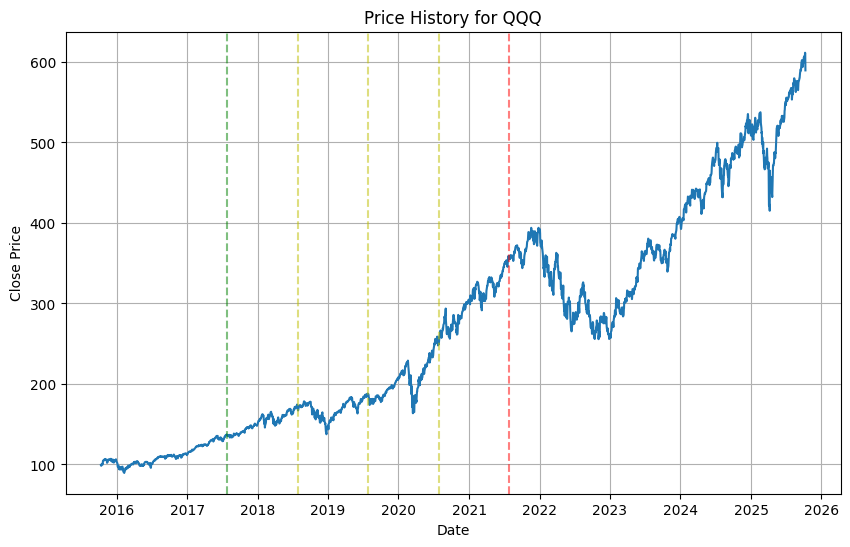


===== Simulating QQQ from 2017-07-27 to 2021-07-27 =====
Prices: [136.21459961 169.41931152 187.89768982 252.2956543  354.96722412]
Pct Changes: [0.24376764 0.1090689  0.34272888 0.40694942]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 1243.767643184242
---Investment 0 grows from 1243.767643184242(at time period 1 to time period 2) to --> 1379.4240144461273
---Investment 0 grows from 1379.4240144461273(at time period 2 to time period 3) to --> 1852.1924596951258
---Investment 0 grows from 1852.1924596951258(at time period 3 to time period 4) to --> 2605.941104250495

Total Value: 2605.941104250495

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1109.0689020616292
---Investment 1 grows from 1109.0689020616292(at time period 2 to time period 3) to --> 1489.1788428851712
---Investment 1 grows from 1489.1788428851712(at time period 3 to time period 4) to --> 2095.1993071462075

Total

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2021-05-04,24.552864,24.779802,24.413211,24.762346,29600,GREK,24.910727,0.014575,23.452415,-0.044820,-0.045855
2022-05-04,23.969616,23.996368,23.354326,23.488084,47300,GREK,22.721201,-0.052083,29.545980,0.232643,0.209161
2023-05-04,29.087193,29.224829,28.894500,29.169775,5900,GREK,29.545980,0.015773,39.047939,0.342444,0.294492
2024-05-03,39.104431,39.104431,38.821953,38.859618,19700,GREK,39.047939,-0.001445,49.620098,0.268912,0.238160
2025-05-02,49.354115,49.551138,48.999477,48.999477,20800,GREK,49.689056,0.006787,NaN,NaN,NaN


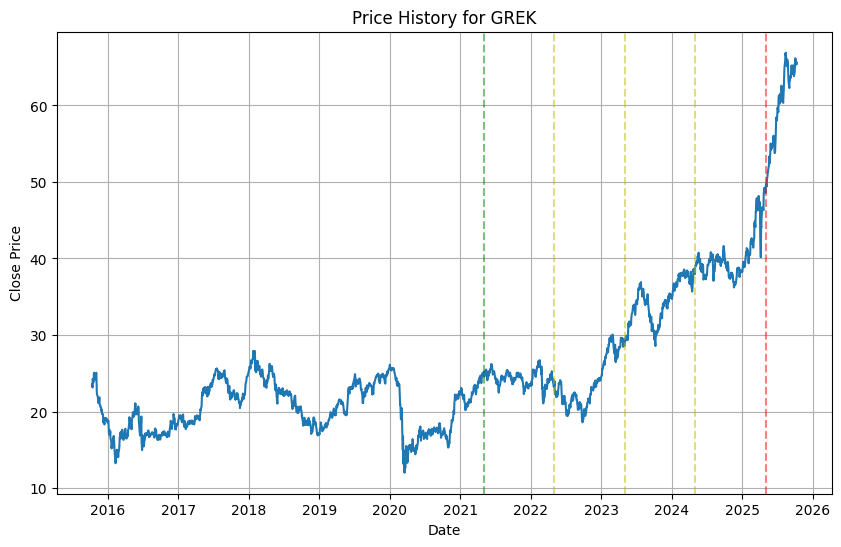


===== Simulating GREK from 2021-05-04 to 2025-05-02 =====
Prices: [24.55286407 23.96961594 29.08719254 39.10443115 49.35411453]
Pct Changes: [-0.02375479  0.21350265  0.34438658  0.26211054]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 976.2452096564749
---Investment 0 grows from 976.2452096564749(at time period 1 to time period 2) to --> 1184.6761521139347
---Investment 0 grows from 1184.6761521139347(at time period 2 to time period 3) to --> 1592.6627147594938
---Investment 0 grows from 1592.6627147594938(at time period 3 to time period 4) to --> 2010.1163914034987

Total Value: 2010.1163914034987

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1213.5026532225477
---Investment 1 grows from 1213.5026532225477(at time period 2 to time period 3) to --> 1631.4166758574174
---Investment 1 grows from 1631.4166758574174(at time period 3 to time period 4) to --> 2059.0281739879947

Tot

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2018-04-23,30.241421,30.545584,30.204551,30.545584,16993600,GDXJ,30.591665,0.011582,27.147038,-0.102323,-0.107945
2019-04-23,26.683937,26.859916,26.498697,26.582056,10764100,GDXJ,27.147038,0.017355,37.235344,0.395422,0.333197
2020-04-23,38.239948,40.165433,37.598118,38.007402,20507200,GDXJ,38.788761,0.014352,46.958721,0.228002,0.205388
2021-04-23,46.958721,47.941557,46.911470,47.629698,3815100,GDXJ,46.996517,0.000805,43.911133,-0.064899,-0.067101
2022-04-22,43.911133,45.345632,43.689700,44.845004,9443300,GDXJ,42.255192,-0.037711,38.740200,-0.117759,-0.125290


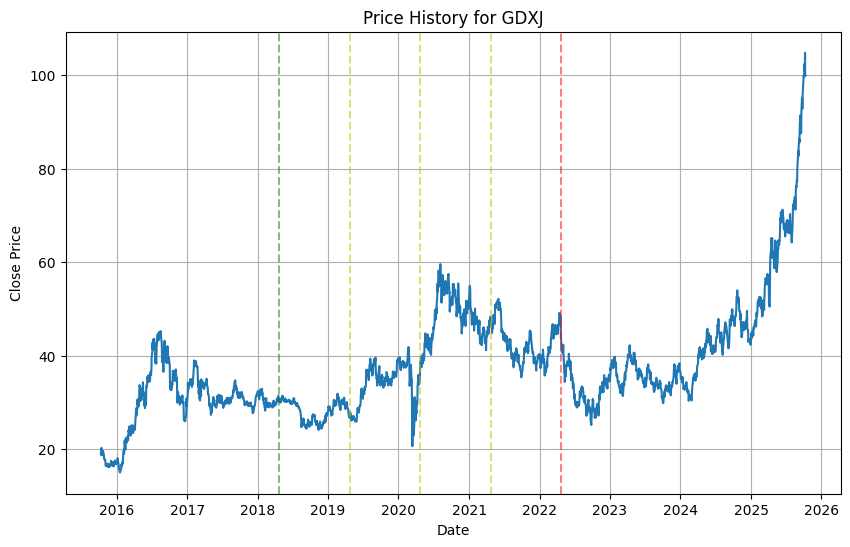


===== Simulating GDXJ from 2018-04-23 to 2022-04-22 =====
Prices: [30.24142075 26.68393707 38.23994827 46.95872116 43.91113281]
Pct Changes: [-0.11763613  0.43306995  0.22800169 -0.0648993 ]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 882.3638709638357
---Investment 0 grows from 882.3638709638357(at time period 1 to time period 2) to --> 1264.4891453373004
---Investment 0 grows from 1264.4891453373004(at time period 2 to time period 3) to --> 1552.794809328969
---Investment 0 grows from 1552.794809328969(at time period 3 to time period 4) to --> 1452.019506012344

Total Value: 1452.019506012344

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1433.0699464791737
---Investment 1 grows from 1433.0699464791737(at time period 2 to time period 3) to --> 1759.8123182817983
---Investment 1 grows from 1759.8123182817983(at time period 3 to time period 4) to --> 1645.6017225934856

Total V

,Close,High,Low,Open,Volume,Stock,(t+1),Daily_Returns,(t+year),Yearly_Returns,Log_Returns
Date,,,,,,,,,,,
2015-12-24,24.759848,24.855800,24.618207,24.641052,927000,SMH,24.700451,-0.002399,33.687454,0.360568,0.307902
2016-12-23,33.687454,33.687454,33.434129,33.434129,1045000,SMH,33.973026,0.008477,45.800323,0.359566,0.307166
2017-12-22,46.323540,46.342223,45.982512,46.220764,4900000,SMH,45.800323,-0.011295,40.713882,-0.121097,-0.129081
2018-12-24,38.547493,39.766385,38.509402,39.256926,9548600,SMH,40.713882,0.056201,68.804070,0.784917,0.579372
2019-12-24,68.804070,68.833065,68.349788,68.833065,2355200,SMH,68.987717,0.002669,103.455307,0.503622,0.407877


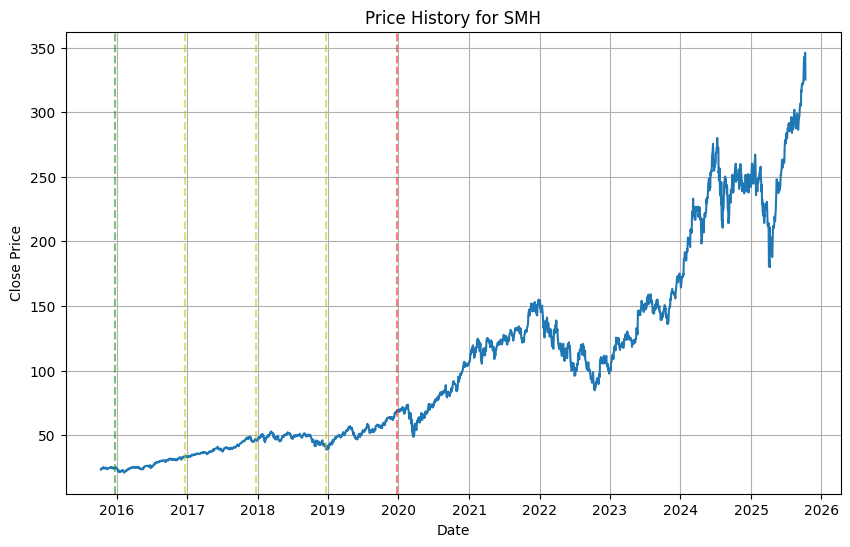


===== Simulating SMH from 2015-12-24 to 2019-12-24 =====
Prices: [24.75984764 33.68745422 46.32353973 38.54749298 68.80406952]
Pct Changes: [ 0.36056791  0.37509767 -0.16786383  0.78491684]

Investment Number 0 of 3
---Investment 0 grows from 1000(at time period 0 to time period 1) to --> 1360.5679126983596
---Investment 0 grows from 1360.5679126983596(at time period 1 to time period 2) to --> 1870.9137635078052
---Investment 0 grows from 1870.9137635078052(at time period 2 to time period 3) to --> 1556.8550154218099
---Investment 0 grows from 1556.8550154218099(at time period 3 to time period 4) to --> 2778.856740828012

Total Value: 2778.856740828012

Investment Number 1 of 3
---Investment 1 grows from 1000(at time period 1 to time period 2) to --> 1375.0976677064928
---Investment 1 grows from 1375.0976677064928(at time period 2 to time period 3) to --> 1144.268507945452
---Investment 1 grows from 1144.268507945452(at time period 3 to time period 4) to --> 2042.4241339903551

Total 

In [51]:
# Perform "Backtest" simulation
qqq_rand_sim = rand_range_single_sim(date_ls, "QQQ", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

grek_rand_sim = rand_range_single_sim(date_ls, "GREK", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

gdjx_rand_sim = rand_range_single_sim(date_ls, "GDXJ", should_plot=True, verbose=True)
print()
print("=====================================================================================================================================================================")

smh_rand_sim = rand_range_single_sim(date_ls, "SMH", should_plot=True, verbose=True)
print()

Simulating GDXJ...
Simulating QQQ...
Simulating SMH...
Simulating GREK...


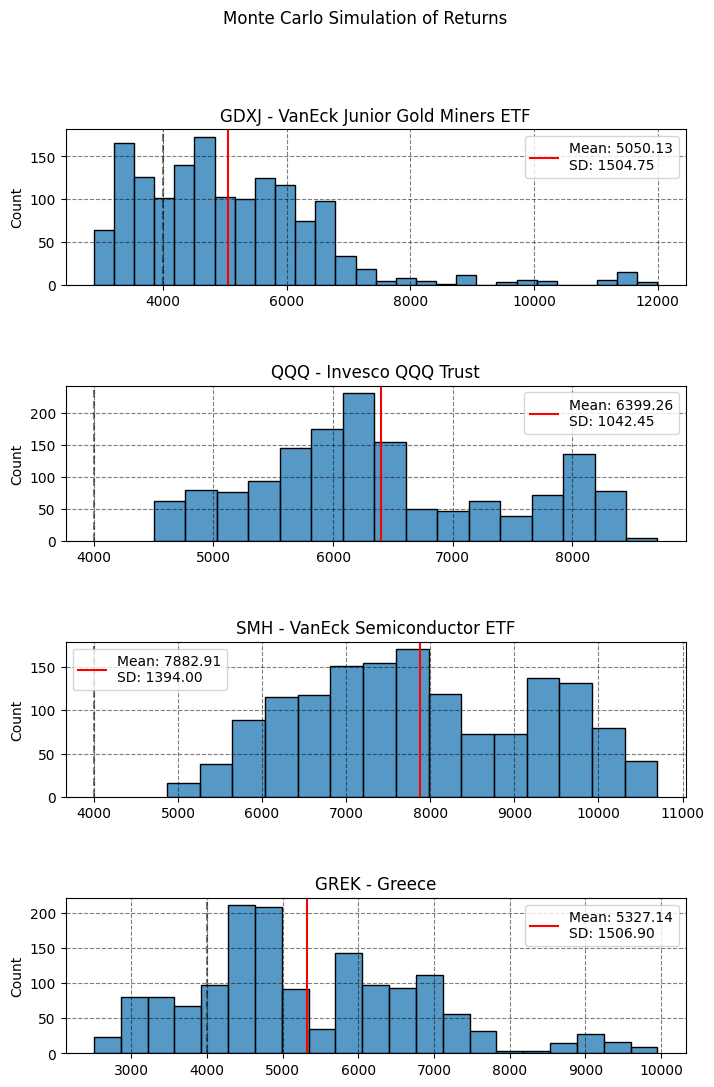

In [55]:
# Perform backtest monte carlo simulation to estimate average returns over that 10 year period for this scenario
cache = {}  # store results o

fig, ax = plt.subplots(4, 1, figsize=(8, 12))
fig.suptitle("Monte Carlo Simulation of Returns")

for i, stock in enumerate(invesments):
    print(f"Simulating {stock}...")
    amts = []

    for _ in range(1500):  # run 1500 simulations
        # pick a random start date (since rand_range_single_sim does that internally)
        # we want to key off that randomness, so we mimic it here
        start_date = pd.Timestamp(np.random.choice(date_ls.unique()))
        key = (stock, start_date)

        # check cache
        if key in cache:
            amt = cache[key]
        else:
            amt = rand_range_single_sim(date_ls, stock)
            cache[key] = amt

        amts.append(amt)

    sns.histplot(amts, ax=ax[i])
    ax[i].set_title(f"{stock} - {investment_names[i]}")
    ax[i].grid(alpha=0.5, color='k', linestyle='--')
    ax[i].axvline(x=ANNUAL_INVESTMENT_AMT*4, color='k', linestyle='--', alpha=0.5)
    ax[i].axvline(
        x=np.mean(amts),
        color='r',
        label=f"Mean: {np.mean(amts):.2f}\nSD: {np.std(amts):.2f}"
    )
    ax[i].legend()

plt.subplots_adjust(hspace=0.65)
plt.show()


Simulating GDXJ...
Simulating QQQ...
Simulating SMH...
Simulating GREK...


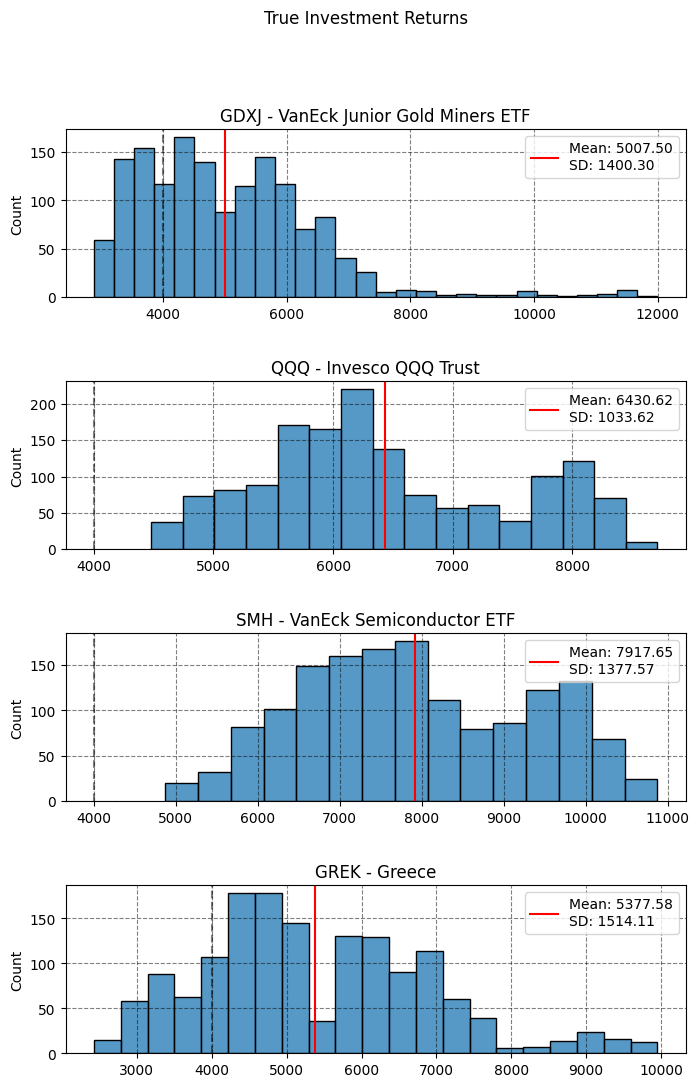

In [56]:
# Now lets loop through all dates to find true means and compare to monte carlo simulation
fig, ax = plt.subplots(4, 1, figsize=(8, 12))
fig.suptitle("True Investment Returns")

for i, stock in enumerate(invesments):
    print(f"Simulating {stock}...")
    amts = []

    for date in sorted(date_ls.unique()):
        amt = rand_range_single_sim(date_ls, stock, start_date=date)
        amts.append(amt)

    sns.histplot(amts, ax=ax[i])
    ax[i].set_title(f"{stock} - {investment_names[i]}")
    ax[i].grid(alpha=0.5, color='k', linestyle='--')
    ax[i].axvline(x=ANNUAL_INVESTMENT_AMT*4, color='k', linestyle='--', alpha=0.5)
    ax[i].axvline(x=np.mean(amts), color='r', label=f"Mean: {np.mean(amts):.2f}\nSD: {np.std(amts):.2f}")
    ax[i].legend()


plt.subplots_adjust(hspace=0.5)

Based off of 10 years of data, we see that to get the highest return you should invest in SMH as investing 1000 dollars a year would approximately get you $7919. However, SMH is relatively volatile, making QQQ a good choice, as you can expect good returns(10% per year), which are low risk, and can act as steady income that will compound. GDXJ and GREK can sometimes lead to high returns, but is very volatile, and we have higher chances of loosing money.
Also, what we see is that the monte carlo simulation comes extremely close to the true mean and volatility of a stock.